In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [67]:
data=pd.read_csv("C:/Users/Devendra/diabetes-dataset.csv")

In [68]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [69]:
data.shape

(2000, 9)

In [70]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [71]:
data.mean()

Pregnancies                   3.70350
Glucose                     121.18250
BloodPressure                69.14550
SkinThickness                20.93500
Insulin                      80.25400
BMI                          32.19300
DiabetesPedigreeFunction      0.47093
Age                          33.09050
Outcome                       0.34200
dtype: float64

In [72]:
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


<Axes: >

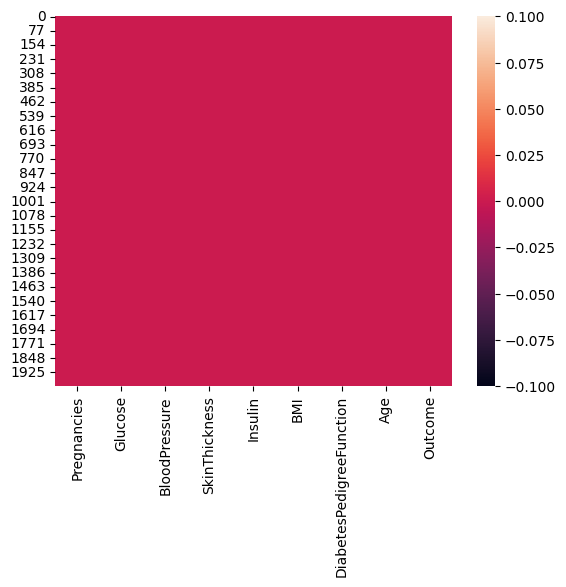

In [73]:
sns.heatmap(data.isnull())

In [74]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307
1,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140


In [75]:
data['Outcome'].value_counts()

Outcome
0    1316
1     684
Name: count, dtype: int64

In [76]:
import plotly.express as px

Before taking sampling, the distribution of Outcomes:
Outcome
0    1316
1     684
Name: count, dtype: int64


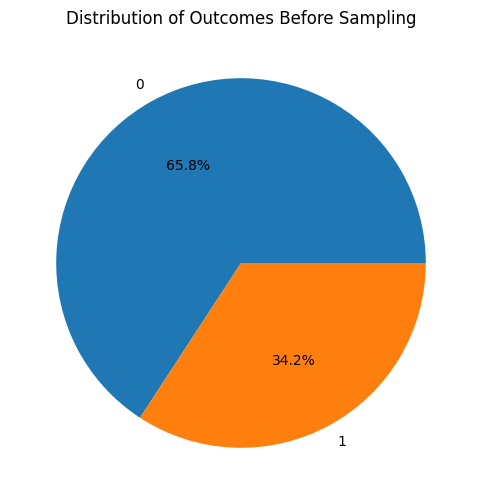

In [77]:
original_outcome_counts = data['Outcome'].value_counts()

print("Before taking sampling, the distribution of Outcomes:")
print(original_outcome_counts)

pyplot.figure(figsize=(6, 6))
pyplot.pie(original_outcome_counts, labels=original_outcome_counts.index, autopct='%1.1f%%') # type: ignore
pyplot.title('Distribution of Outcomes Before Sampling')
pyplot.show()

In [78]:
data.count()

Pregnancies                 2000
Glucose                     2000
BloodPressure               2000
SkinThickness               2000
Insulin                     2000
BMI                         2000
DiabetesPedigreeFunction    2000
Age                         2000
Outcome                     2000
dtype: int64

In [79]:
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']

In [80]:
print(X)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  
0                        0.127   47  
1                      

In [81]:
print(X)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  
0                        0.127   47  
1                      

In [82]:
print(Y)

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64


In [83]:
numeric_data = data.select_dtypes(include='number')
correlation = numeric_data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.120405       0.149672      -0.063375   
Glucose                      0.120405  1.000000       0.138044       0.062368   
BloodPressure                0.149672  0.138044       1.000000       0.198800   
SkinThickness               -0.063375  0.062368       0.198800       1.000000   
Insulin                     -0.076600  0.320371       0.087384       0.448859   
BMI                          0.019475  0.226864       0.281545       0.393760   
DiabetesPedigreeFunction    -0.025453  0.123243       0.051331       0.178299   
Age                          0.539457  0.254496       0.238375      -0.111034   
Outcome                      0.224437  0.458421       0.075958       0.076040   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.076600  0.019475                 -0.025453   
Glucose                   0.320371  0.226

<Axes: >

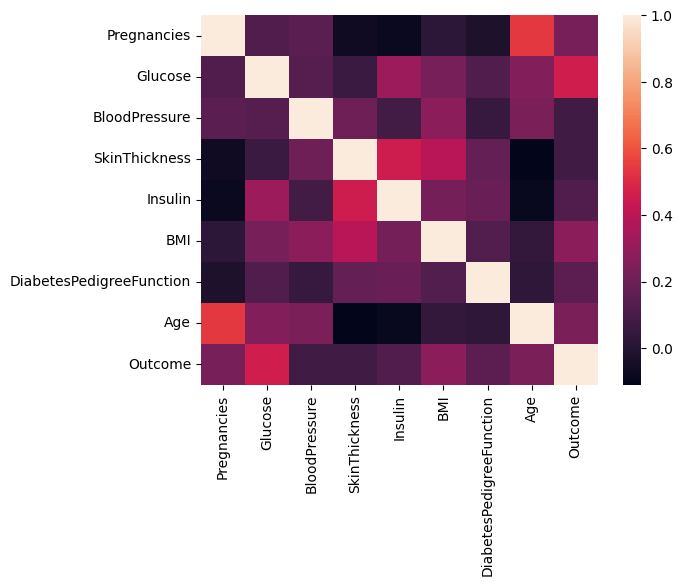

In [84]:
sns.heatmap(correlation)

In [85]:
scaler = StandardScaler()

In [86]:
scaler.fit(X)

StandardScaler()

In [87]:
standardized_data = scaler.transform(X)

In [88]:
print(standardized_data)

[[-0.5153943   0.52455322 -0.37248123 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.12049474 -1.1597562   0.67008046 ...  0.73724853 -0.7355513
  -0.85632626]
 [-1.12049474  0.74288962 -3.60442246 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.12856529  0.46156812 ... -0.12187245 -0.27492362
   0.75610116]
 [-1.12049474  0.24383498  2.12966682 ...  4.28419085 -0.46968566
  -0.60173245]
 [-0.5153943  -1.25332895  0.14879962 ... -0.25687717  0.23516743
  -0.68659705]]


In [89]:
X = standardized_data
Y = data['Outcome']

In [90]:
print(X)

[[-0.5153943   0.52455322 -0.37248123 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.12049474 -1.1597562   0.67008046 ...  0.73724853 -0.7355513
  -0.85632626]
 [-1.12049474  0.74288962 -3.60442246 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.12856529  0.46156812 ... -0.12187245 -0.27492362
   0.75610116]
 [-1.12049474  0.24383498  2.12966682 ...  4.28419085 -0.46968566
  -0.60173245]
 [-0.5153943  -1.25332895  0.14879962 ... -0.25687717  0.23516743
  -0.68659705]]


In [91]:
print(Y)

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64


In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [93]:
classifier = svm.SVC(kernel='linear')

In [94]:

#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [95]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [96]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.775


In [97]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [98]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.805


In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
print(f'Before taking sampling,the distribution of Outcomes:')
print(data.Outcome.value_counts())

Before taking sampling,the distribution of Outcomes:
Outcome
0    1316
1     684
Name: count, dtype: int64


In [101]:
sm = SMOTE(random_state=42)

In [102]:
X,Y = sm.fit_resample(X,Y) 

In [103]:
print(f'After sampling the data,the distribution of Outcomes:')
print(Y.value_counts())

After sampling the data,the distribution of Outcomes:
Outcome
1    1316
0    1316
Name: count, dtype: int64


In [137]:
input_data = (1,0,48,20,0,24.7,0.14,22)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [133]:
import pickle

In [106]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [107]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [136]:
input_data = (1,0,78,26,71,29.3,0.767,36)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


In [117]:
filename = 'trained_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [110]:
loaded_modell = pickle.load(open('trained_model.sav', 'rb'))

In [129]:
input_data = (1,0,48,20,0,24.7,0.14,22)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_modell.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
